# House princing prediction with linear regression
## Abraham Cisneros Valladolid


# Importing libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [12]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'bengaluru_house_prices.csv'

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.groupby("area_type")['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Cleaning data 

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

As we can see through the data, we confirm that all entries have their price, so we don't need to drop the ones that don't have it.

However, for "society" we can observe that nearly half of the entries lack that information, so we should drop it, because there is too many missing values.
Also, area type and availability can be deleted due to their minor importance for the prediction.

On the other hand "balcony" and "bathroom" have less than 10% missing values, therefore, we can drop those null values but not the entire column.

In [ ]:
df2 = df.drop(columns=["society", "availability", "area_type"])
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

we are gonnna start to clear the "size" column

In [ ]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

As we can see, all values are two tokens strings, a good aproach can be using split and just obtain the number of bedrooms

In [ ]:
df3["number_bedrooms"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head(5)

/tmp/ipykernel_52636/3875004372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["number_bedrooms"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,balcony,price,number_bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


{'whiskers': [<matplotlib.lines.Line2D at 0x74256c1b9ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x74256c1ba140>,
 'boxes': [<matplotlib.lines.Line2D at 0x74256c1b9840>],
 'medians': [<matplotlib.lines.Line2D at 0x74256c1ba740>],
 'fliers': [<matplotlib.lines.Line2D at 0x74256c1baa40>],
 'means': []}

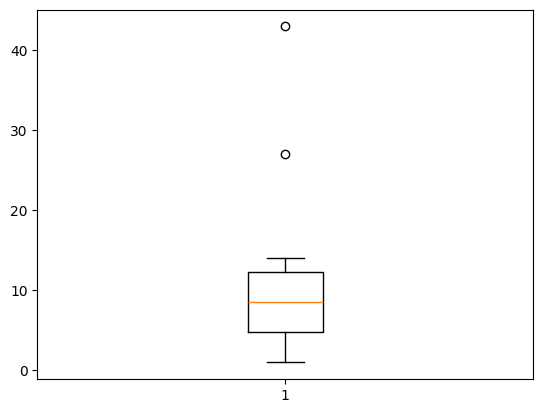

In [ ]:
plt.boxplot(df3["number_bedrooms"].unique())

In [ ]:
df3["number_bedrooms"].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

We can see some outliers of 27 and 43 bedrooms, let's take a closer look to them 

In [ ]:
df3[df3["number_bedrooms"]>20]

,location,size,total_sqft,bath,balcony,price,number_bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [ ]:
df3 = df3.drop(index=[1718, 4684])


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There is some values that are in ranges, beacuse there some entries without the exact size value of the land. One great approach could be doing an median estimator to those values.

In [ ]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[df3["total_sqft"].apply(isfloat)]

,location,size,total_sqft,bath,balcony,price,number_bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


Due that majority of the values are float, we should look for those that aren't

In [ ]:
df3[~df3["total_sqft"].apply(isfloat)]

,location,size,total_sqft,bath,balcony,price,number_bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [ ]:
def median_sqft(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

We can try some of the ranges values too compare the result and verify if it is right.

In [ ]:
median_sqft("3067 - 8156")

5611.5

In [ ]:
df3["total_sqft_fix"] = df3["total_sqft"].apply(median_sqft)

In [ ]:
df3.loc[122]

location                Hebbal
size                     4 BHK
total_sqft         3067 - 8156
bath                       4.0
balcony                    0.0
price                    477.0
number_bedrooms              4
total_sqft_fix          5611.5
Name: 122, dtype: object

The register "122", got a fixed total_sqft value.

In [ ]:
df3.head(10)

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2,1170.0
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3,1310.0
10,Whitefield,3 BHK,1800,2.0,2.0,70.00,3,1800.0
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,4,2785.0
12,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00,2,1000.0


Now, for the visualization, there is no point on having the columns that were used to create the clean columns "number_bedrooms" and "total_sqft_fix", therefore, we can drop those columns in a new dataframe.

In [ ]:
df4 = df3.copy()
df4.drop(columns=["size", "total_sqft"])
df4.rename({"number_bedrooms": "size"})

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3,1715.0
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5,3453.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4,4689.0


# Feature engineering

In [ ]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft_fix"]
df5.head()

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,4250.000000


We 

In [ ]:
len(df5["location"].unique())

1264

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield             515
Sarjapur  Road         372
Electronic City        302
Kanakpura Road         261
Thanisandra            234
                      ... 
Whietfield,              1
Whitefield ECC Road      1
Williams Town            1
Xavier Layout            1
Viviani Road             1
Name: location, Length: 1253, dtype: int64

There is a lot of data points with only 1 entry, let's see how many are

In [ ]:
len(location_stats[location_stats<=10])

1016

In [ ]:
location_stats_less_10 = (location_stats[location_stats<=10])
location_stats_less_10

location
Gunjur Palya             10
Kodigehalli              10
Kalkere                  10
HAL 2nd Stage            10
1st Block Koramangala    10
                         ..
Whietfield,               1
Whitefield ECC Road       1
Williams Town             1
Xavier Layout             1
Viviani Road              1
Name: location, Length: 1016, dtype: int64

We should group the all those outlier

In [ ]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less_10 else x)
len(df5.location.unique())

238

# Outliers

By domain knowledge you can have some intuation about entries that are'nt supposte to exist, like the normal house price by bedroom it is around 300, so less than that, could be a potencially outlier.

In [ ]:
df5.head(5)

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,4250.000000


In [ ]:
df5[(df5.total_sqft_fix / df5.number_bedrooms)<300].head(5)

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407,4.0,1.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,0.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,500,3.0,2.0,100.0,3,500.0,20000.000000
78,Kaval Byrasandra,2 BHK,460,1.0,0.0,22.0,2,460.0,4782.608696
89,Rajaji Nagar,6 Bedroom,710,6.0,3.0,160.0,6,710.0,22535.211268


In [ ]:
df5.shape

(12708, 9)

In [ ]:
df6 = df5[~(df5.total_sqft_fix / df5.number_bedrooms<300)]
df6.shape


(12055, 9)

We got at the least 700 entities deleted due to the probability of being an outlier.

In [ ]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

The minimum and maximum looks to be less likely to exist, meaning that could be more outliers, therefore, we can use the standar deviation for deleting those noise values.

In [ ]:
def remove_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        o = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m-o)) & (subdf.price_per_sqft < (m+o))]
        df_out = pd.concat([df_out,reduce_df], ignore_index=True)
    return df_out

df7 = remove_outliers(df6)
df7.shape

(9848, 9)

By this method, we removed 2207 outliers, getting always the 68% of the data for each location, supposing that it is a normal distribution

In [ ]:
df7.head(5)

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,1.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,2.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,3.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,0.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,2.0,148.0,2,1235.0,11983.805668


In [ ]:
df7.total_sqft_fix

0       2850.0
1       1630.0
2       1875.0
3       1200.0
4       1235.0
         ...  
9843    1256.0
9844    1353.0
9845     812.0
9846    1440.0
9847    1075.0
Name: total_sqft_fix, Length: 9848, dtype: float64

Looking for more outliers, there is some places that are in the same price, even when they have less bedrooms, and sqft area. Of course this could be for many reasons, like the state of the structure, the soil, etc. 

However, in terms of predictions, this leads to noisy predictions. 

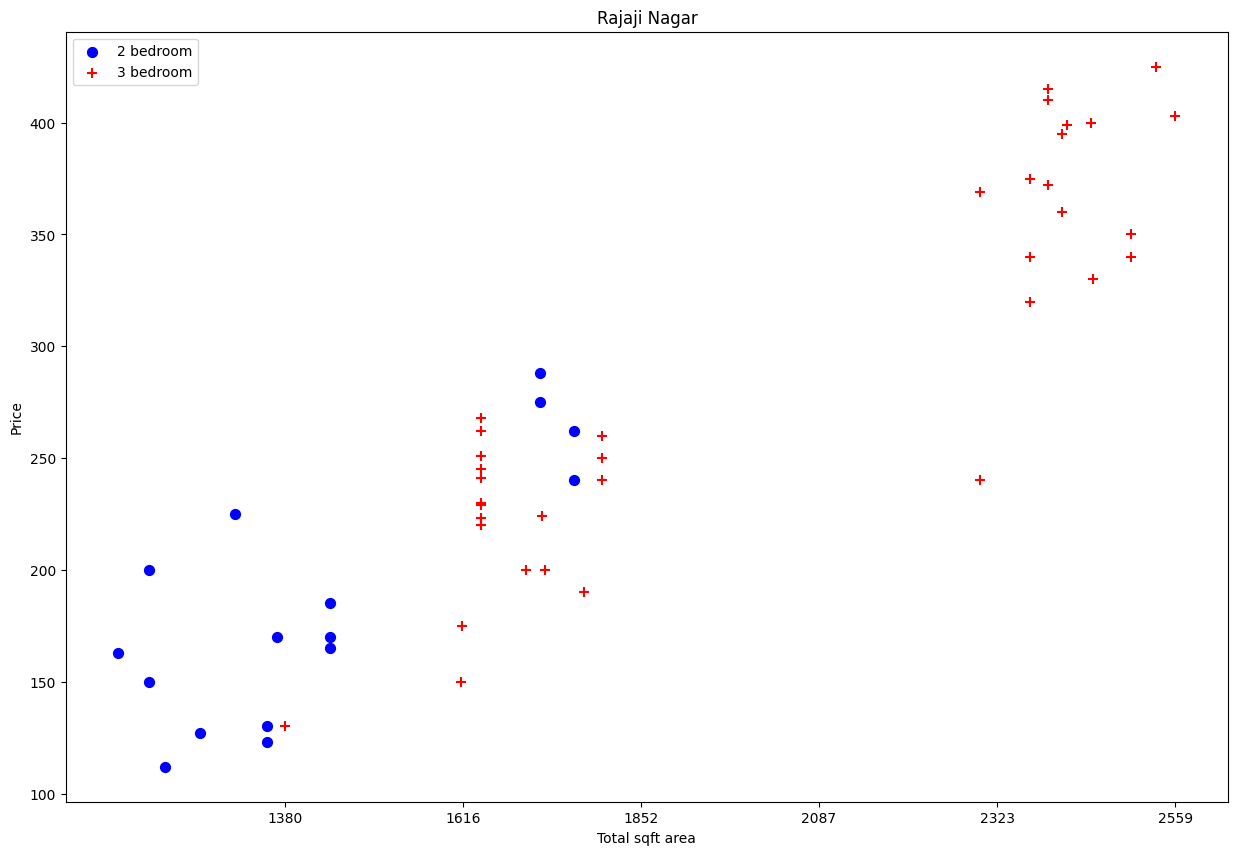

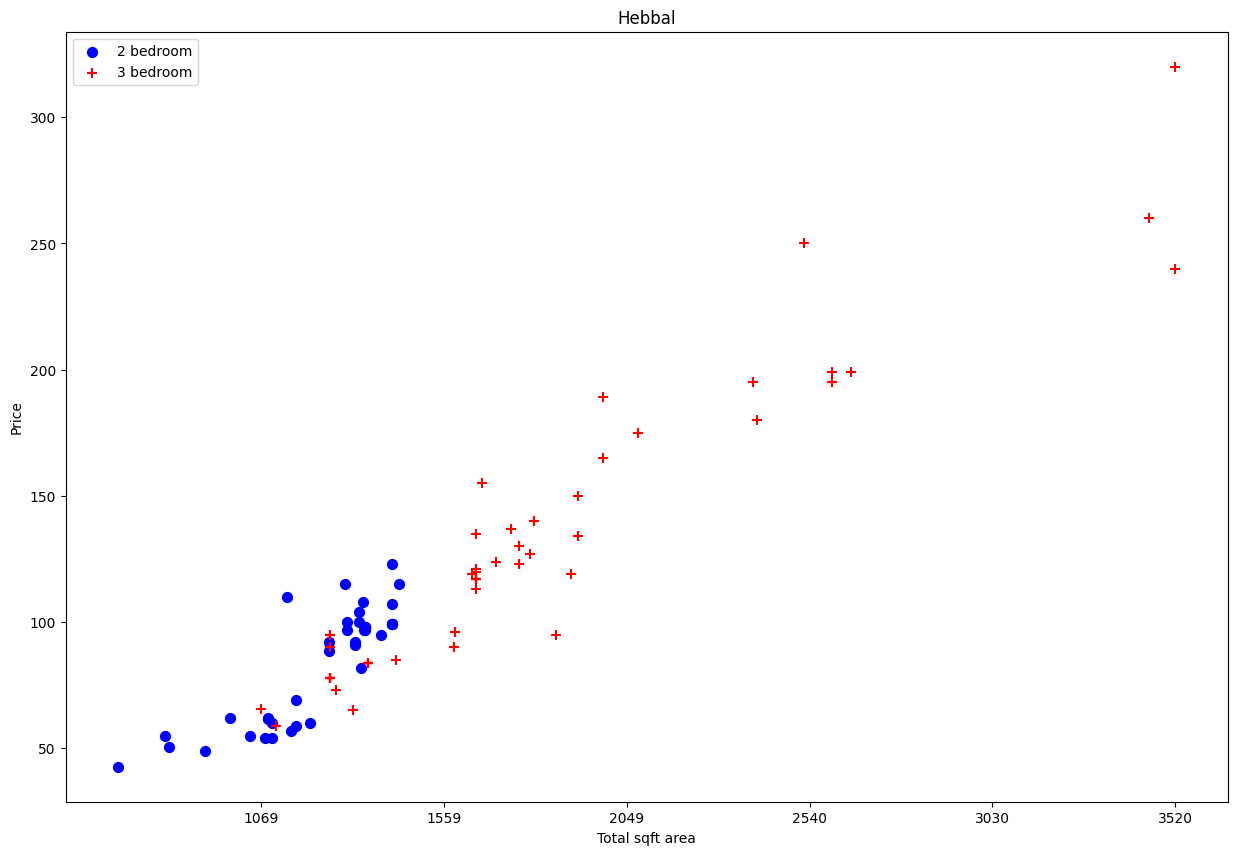

In [ ]:
def scatter_location(df, location):
    two_bedrooms = df[(df.location == location) & (df.number_bedrooms == 2)]
    three_bedrooms = df[(df.location == location) & (df.number_bedrooms == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(two_bedrooms.total_sqft_fix, two_bedrooms.price, color="blue", label="2 bedroom", s=50)
    plt.scatter(three_bedrooms.total_sqft_fix, three_bedrooms.price, color="red", marker="+", label="3 bedroom", s=50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price")
    plt.title(location)

     # Setting fewer bins on x-axis
    min_val, max_val = three_bedrooms.total_sqft_fix.min(), three_bedrooms.total_sqft_fix.max()
    plt.xticks(np.linspace(min_val, max_val, num=6))  
    plt.legend()


scatter_location(df7, "Rajaji Nagar")
scatter_location(df7, "Hebbal")

  

As we can see, there is some values that are overlap, meaning the values of properties that have less bedrooms but the same sqft area, have close values.


In [ ]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("number_bedrooms"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("number_bedrooms"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")
df8 = remove_bedroom_outliers(df7)
df8.shape

(7025, 9)

Let's see how the outliers were treated.

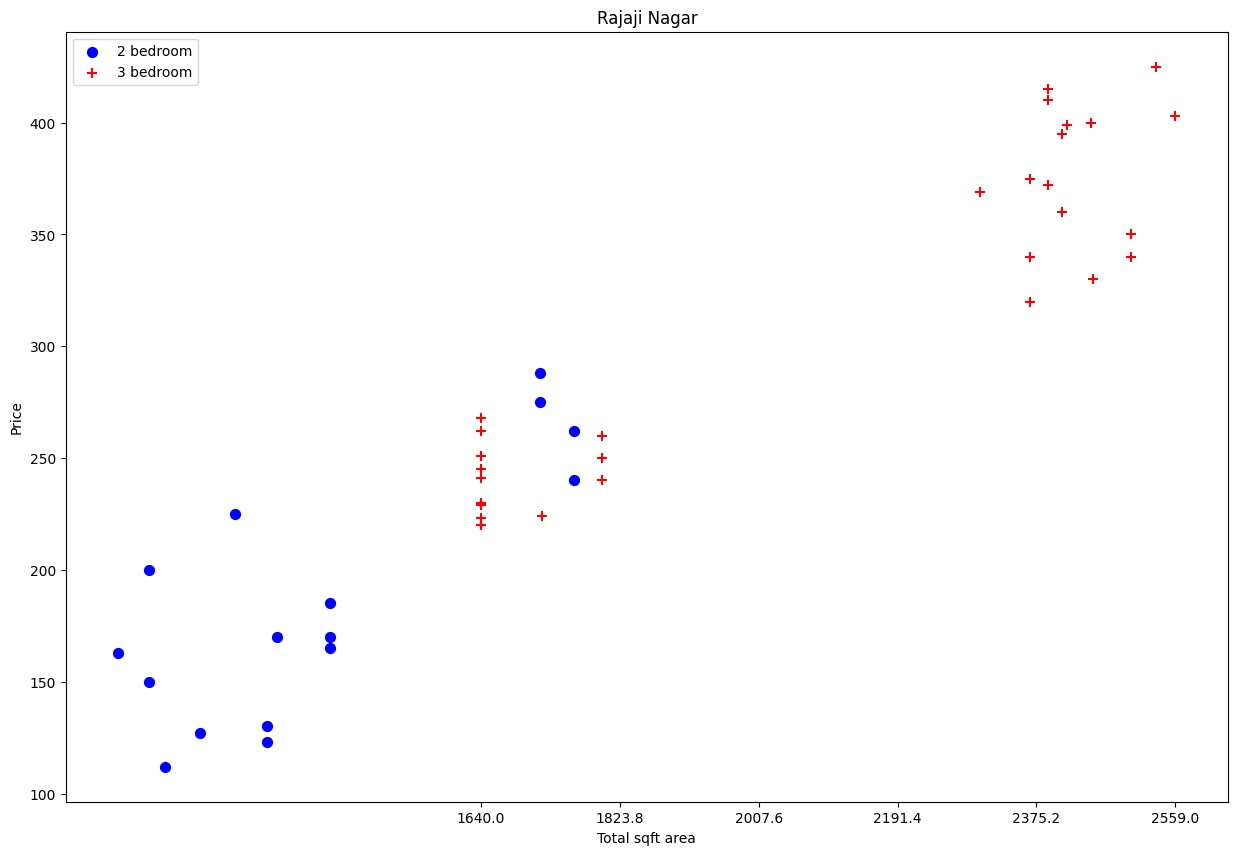

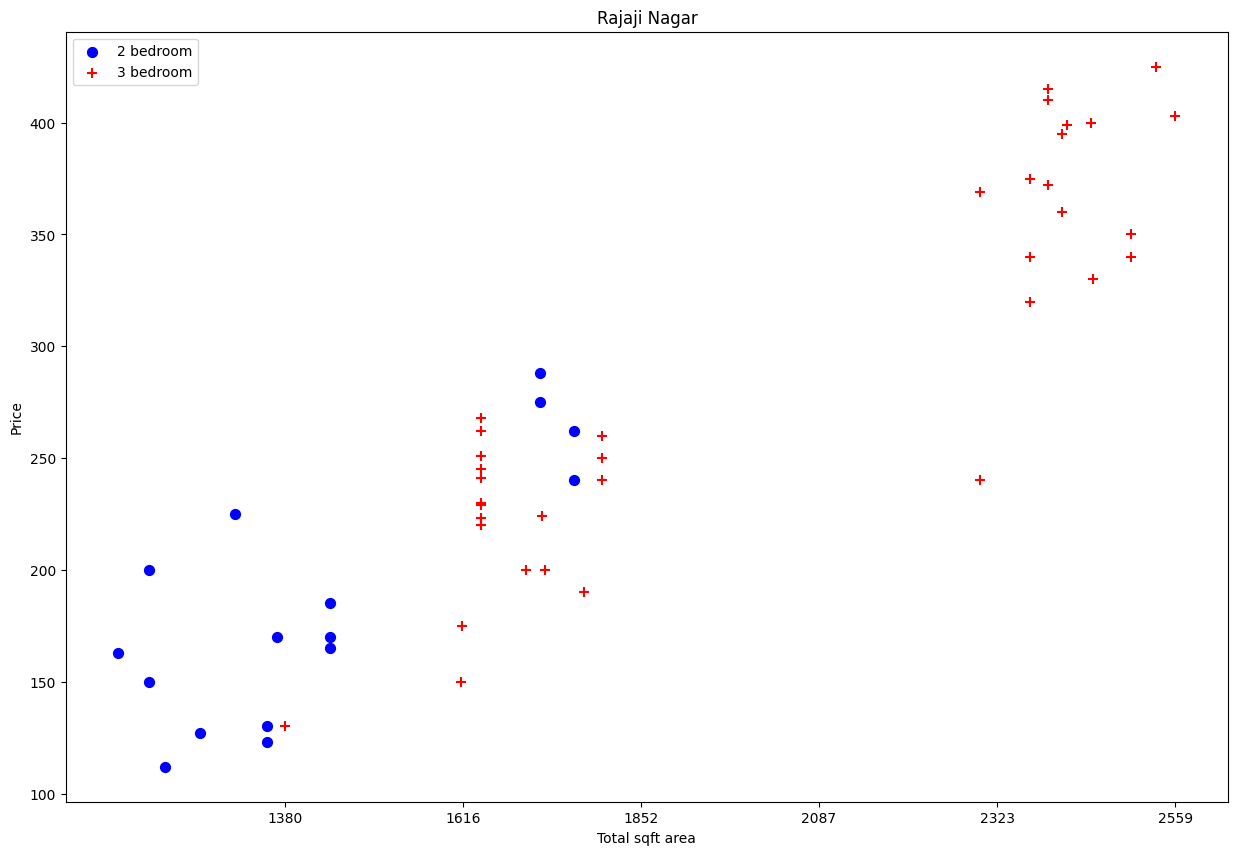

In [ ]:
scatter_location(df8, "Rajaji Nagar")
scatter_location(df7, "Rajaji Nagar")

We can see how some red crosses have been deleted

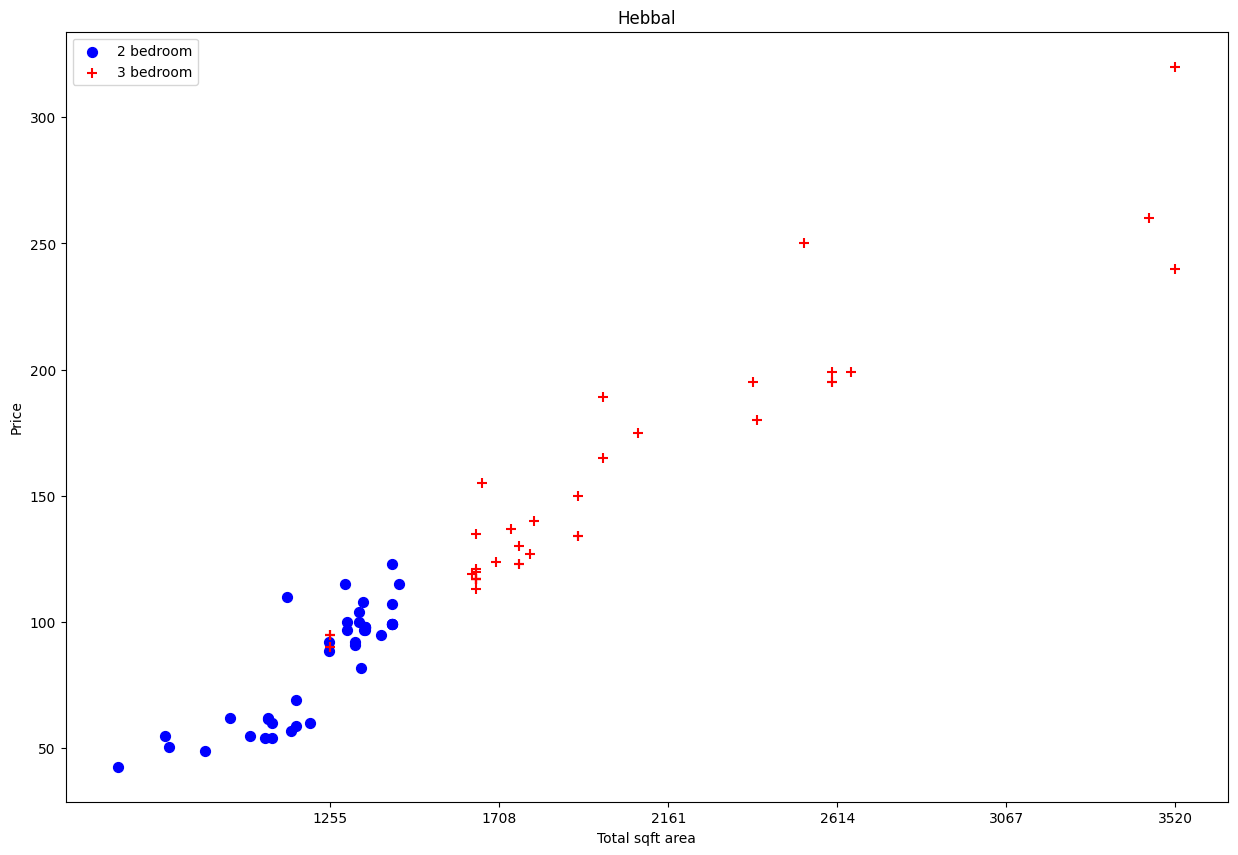

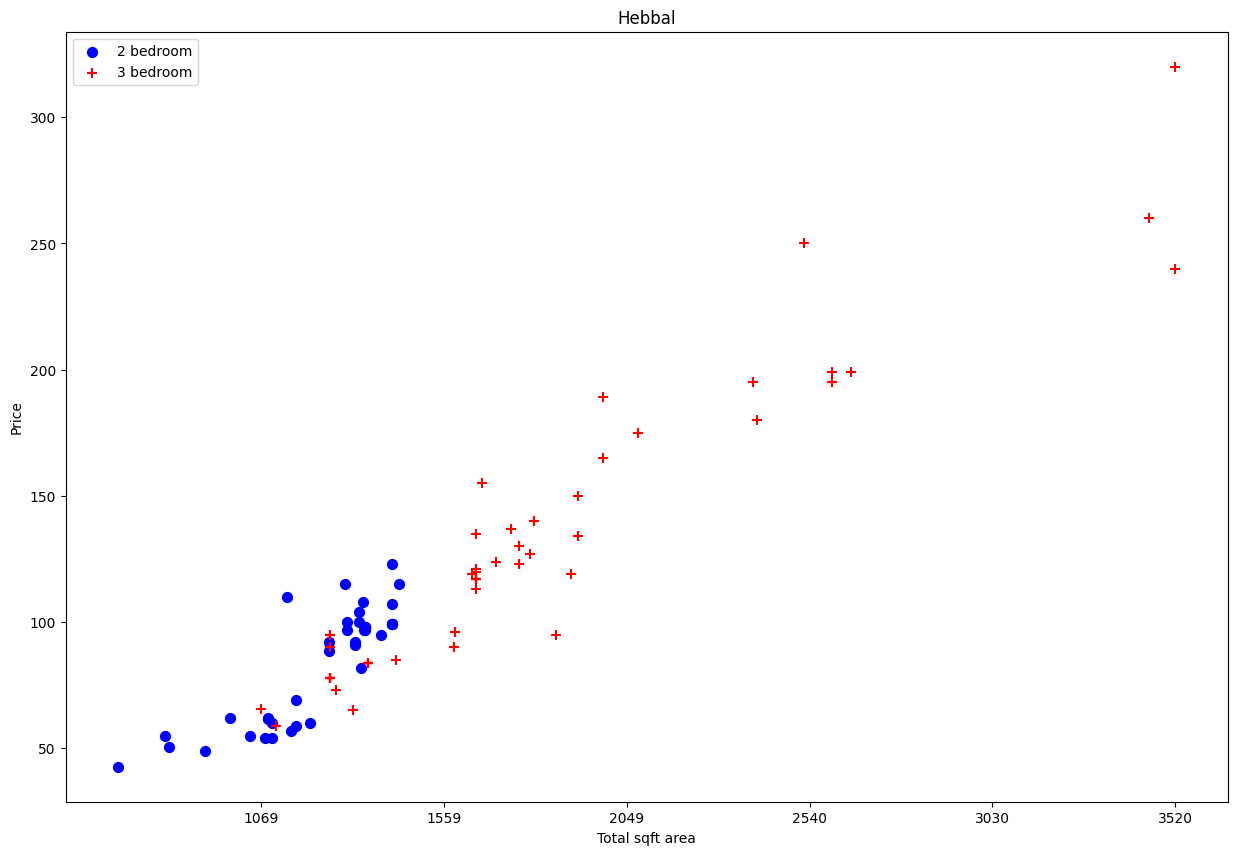

In [ ]:
scatter_location(df8, "Hebbal")
scatter_location(df7, "Hebbal")

Same case here, we are trying to remove those values that are under the mean, because trying to handdle values above the mean could be more complex.

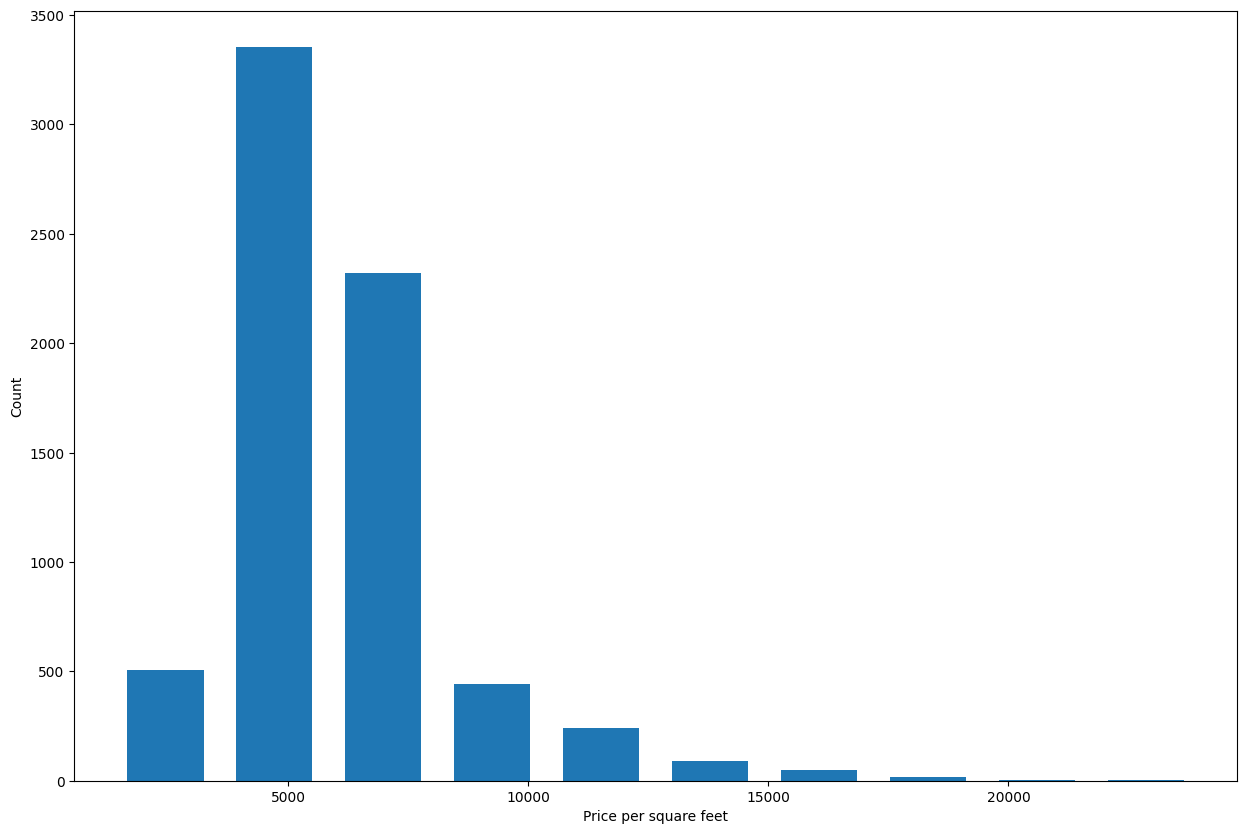

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df8.price_per_sqft, rwidth=0.7)
plt.xlabel("Price per square feet")
plt.ylabel("Count")
plt.show()

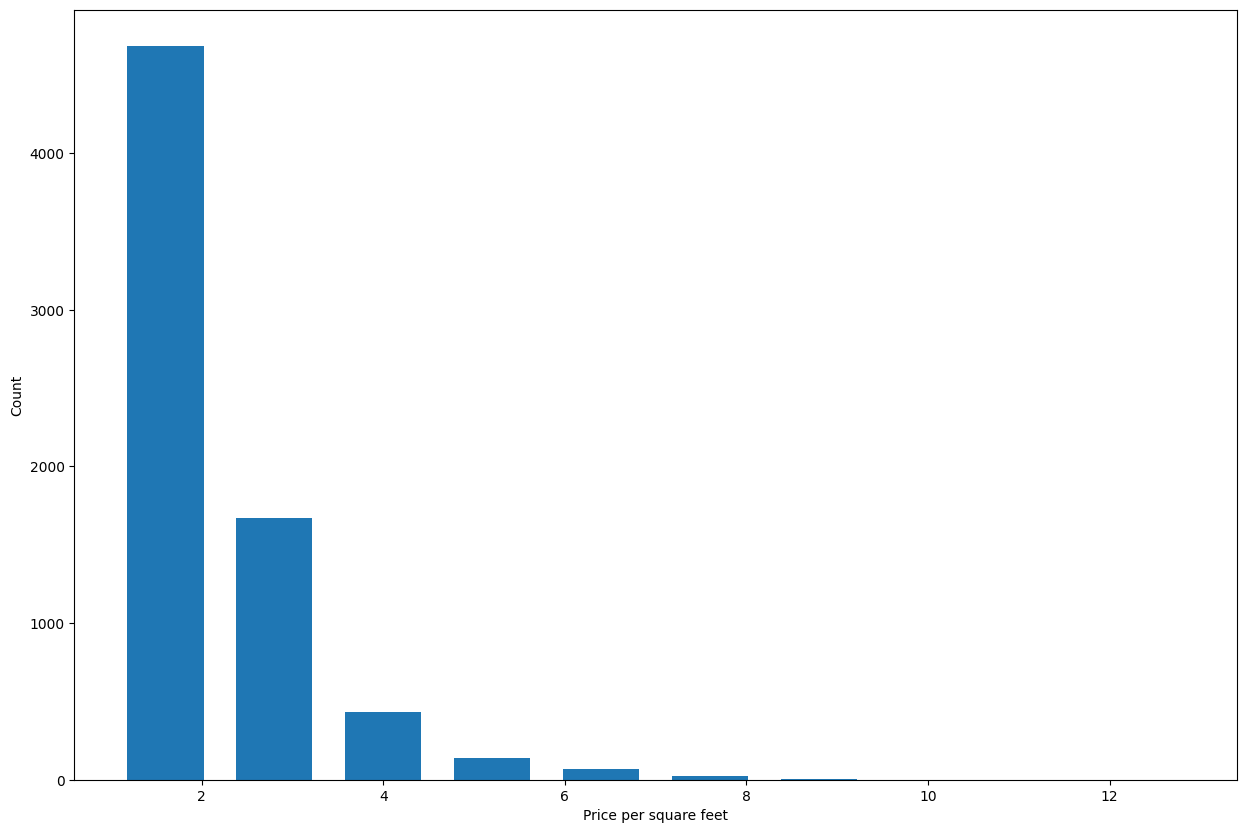

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df8.bath, rwidth=0.7)
plt.xlabel("Price per square feet")
plt.ylabel("Count")
plt.show()

There is a rule where if the house have the same number of bathrooms than bedrooms plus two, then it is a outlier.

In [ ]:
df8[df8.bath > df8.number_bedrooms+2]

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460,7.0,2.0,80.0,4,2460.0,3252.032520
6450,Thanisandra,3 BHK,1806,6.0,2.0,116.0,3,1806.0,6423.034330
8091,other,6 BHK,11338,9.0,1.0,1000.0,6,11338.0,8819.897689


In [ ]:
df9 = df8[~(df8.bath > df8.number_bedrooms+2)]
df9.shape 

(7022, 9)

# Predicction

To use some machine learning algorithm we should remove those columns that are not numerical, because it can not interpret that type of data. However, we can convert each catergory to a column that will be true only for that specific category, using one-hot-encoding or get_dummies from pandas.

In [ ]:
df9.head(5)

,location,size,total_sqft,bath,balcony,price,number_bedrooms,total_sqft_fix,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850,4.0,1.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630,3.0,2.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875,2.0,3.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200,2.0,0.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235,2.0,2.0,148.0,2,1235.0,11983.805668


In [ ]:
df10 = df9.drop(columns=["size", "total_sqft", "balcony", "price_per_sqft"])
df10.head(5)

,location,bath,price,number_bedrooms,total_sqft_fix
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


We dropped some discrete values, due redundancy. Now, we have columns that are meaningfull for the prediction.

In [ ]:
dummies = pd.get_dummies(df10.location)
df11 = pd.concat([df10, dummies.drop("other", axis=1)], axis=1)
df11.head(5)

,location,bath,price,number_bedrooms,total_sqft_fix,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3.0,194.0,3,1630.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,2.0,235.0,3,1875.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,2.0,130.0,3,1200.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2.0,148.0,2,1235.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We dropped last column from "dummies" data frame, because at the moment of using "get_dummies" we created one column per value in "location" therefore, only one of those columns will be "1" or "true", the last remaning always will be "false". This will cause that the last column will have a "true" but all the other columns will be "false". This is a pattern, when everything is "false" then we can deduce that it do not belongs to any category. 

In data, maybe we lose some interpretation, but algorithms seeks patterns, and that explanation is one.

In [ ]:
df12 = df11.drop(columns=["location"])
df12.head(3)

,bath,price,number_bedrooms,total_sqft_fix,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,194.0,3,1630.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,235.0,3,1875.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12.shape

(7022, 241)

In [ ]:
X = df12.drop(columns=["price"])
X.head(3)

,bath,number_bedrooms,total_sqft_fix,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3,1630.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3,1875.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8550657277540173

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85506573, 0.80596801, 0.87131528, 0.81143208, 0.89475183])

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/home/abraham/anaconda3/envs/ISLPYTHON/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/abraham/anaconda3/envs/ISLPYTHON/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abraham/anaconda3/envs/ISLPYTHON/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/abraham/anaconda3/envs/ISLPYTHON/lib/python3.10/site-packages/sklearn/base.py", line 666, in _val

,model,best_score,best_params
0,linear_regression,0.847707,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.697849,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.736156,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Now, we want to make a prediction but we converted all of our locations into a get_dummies, creating hundreds of columns, so we actually don't know which one should be "true", thus, the next function finds out what column it is and give the corresponding index to prediction.

In [ ]:
def predict_price(bath, number_bedrooms, total_sqft_fix, location):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = number_bedrooms
    x[2] = total_sqft_fix
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [ ]:
X.columns

Index(['bath', 'number_bedrooms', 'total_sqft_fix', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

In [ ]:
predict_price(2, 2, 1000, "1st Phase JP Nagar")

NameError: name 'predict_price' is not defined

In [ ]:
predict_price(3, 3, 1000, "1st Phase JP Nagar")

/home/abraham/anaconda3/envs/ISLPYTHON/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.64171469612252

In [ ]:
predict_price(2, 2, 1000, "Indira Nagar")

/home/abraham/anaconda3/envs/ISLPYTHON/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


141.42849903161607

In [ ]:
import pickle

with open("bangalore_home_prices_model.picke", "wb") as f:
    pickle.dump(lr_clf, f)

import json 
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open ("columns.json", "w") as f:
    f.write(json.dumps(columns))

# Statistic reasoning

We know that linear regression perform better than the other regresors, due to the performance values. But i want in a statistc way, why its is better those results, so with the new things that i have learn, i will try to make it better as i can. 

#

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP.models import (ModelSpec as MS,
                         summarize)

df12

,bath,price,number_bedrooms,total_sqft_fix,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,194.0,3,1630.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,235.0,3,1875.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,130.0,3,1200.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,148.0,2,1235.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,2.0,64.0,2,1155.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9840,2.0,70.0,2,1200.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9841,1.0,200.0,1,1800.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9844,2.0,110.0,2,1353.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
terms = df12.drop(columns=["price"])
y = df12.price
X = MS(terms).fit_transform(df12)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     161.9
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:43:56   Log-Likelihood:                -34390.
No. Observations:                7022   AIC:                         6.926e+04
Df Residuals:                    6781   BIC:                         7.091e+04
Df Model:                         240                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept         

In [ ]:
RSE = np.sqrt(results.scale)
RSE

32.98313342318813

In [ ]:
meanA = df12.price.mean()

In [ ]:
meanA / RSE

2.860204570663384

Now, by this information that our regression suggests, there is enough evidence to use this predictiors with a high confidence, also, our RSE show us that 32 units of price variance is explain by the model, but thats only 2.8% of relative error, whearas less is better.